# AI-Driven Intrusion Detection: A Federated Learning Dataset for Cloud and Edge Security

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import os
import joblib
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

## Data Analysis

In [2]:
data = pd.read_csv(r"C:\Users\USER\Desktop\saint martins\Traffic\BoTNeTIoT-L01-v2.csv")

In [3]:
data

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,...,98.000000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.348699e-06,138.592929,...,98.000000,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.000000,0.000000e+00,114.856432,...,66.000000,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.000000,0.000000e+00,74.000000,...,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.000000,9.536743e-07,74.000000,...,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,Danmini_Doorbell,gafgyt,combo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062601,2.937269,217.763487,1.770682e+04,2.937269,217.763487,1.770682e+04,1.220882,60.000000,9.540000e-07,84.852814,...,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062602,1.730254,282.630543,1.054589e+04,1.730254,282.630543,1.054589e+04,1.213342,330.000000,5.390000e-06,431.490440,...,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062603,2.730251,299.980395,7.204117e+03,2.730251,299.980395,7.204117e+03,1.213352,330.000000,6.610000e-06,431.490440,...,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062604,2.882414,216.723647,1.775308e+04,2.882414,216.723647,1.775308e+04,1.209274,60.000000,6.740000e-07,84.852814,...,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1


In [4]:
data.head()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,98.000000,...,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,138.592929,...,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,114.856432,...,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,74.000000,...,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,Danmini_Doorbell,gafgyt,combo,0


In [5]:
data.tail()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack,Attack_subType,label
7062601,2.937269,217.763487,17706.82364,2.937269,217.763487,17706.82364,1.220882,60.000000,9.540000e-07,84.852814,...,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062602,1.730254,282.630543,10545.88790,1.730254,282.630543,10545.88790,1.213342,330.000000,5.390000e-06,431.490440,...,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062603,2.730251,299.980395,7204.11662,2.730251,299.980395,7204.11662,1.213352,330.000000,6.610000e-06,431.490440,...,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062604,2.882414,216.723647,17753.08315,2.882414,216.723647,17753.08315,1.209274,60.000000,6.740000e-07,84.852814,...,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1
7062605,2.032574,154.377267,13032.48760,2.032574,154.377267,13032.48760,1.299681,145.339354,1.010891e+02,195.783485,...,145.339354,1.010891e+02,195.783485,1.218303e+04,1.917443e+03,2.328946e-01,SimpleHome_XCS7_1003_WHT_Security_Camera,Normal,Normal,1


In [6]:
data.describe()

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
count,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,...,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06,7.062606e+06
mean,3.400682e+03,1.794441e+02,1.931062e+04,3.400682e+03,1.794441e+02,1.931066e+04,1.892359e+03,1.792406e+02,4.415659e+00,1.865562e+02,...,7.497349e+08,1.114786e+16,1.369083e+02,1.792334e+02,1.912623e+00,1.842961e+02,9.254144e+02,9.101316e+01,1.845142e-03,7.871485e-02
std,2.897012e+03,1.537109e+02,2.636844e+04,2.897012e+03,1.537107e+02,2.636842e+04,2.523083e+03,2.059018e+02,2.243629e+01,2.067658e+02,...,7.459028e+08,7.282259e+16,6.510637e+02,2.061473e+02,2.013019e+01,2.077680e+02,1.463365e+04,1.976009e+03,5.208508e-02,2.692932e-01
min,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,...,2.484468e-03,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,-1.312975e+05,-1.586467e+00,0.000000e+00
25%,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,...,4.041758e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.644882e+03,7.412707e+01,9.807711e+01,3.644882e+03,7.412707e+01,9.810144e+01,1.071281e+00,7.020764e+01,0.000000e+00,7.399665e+01,...,6.745729e+08,1.501619e-03,1.000000e+00,6.600001e+01,0.000000e+00,7.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.354692e+03,3.486463e+02,4.887076e+04,6.354692e+03,3.486463e+02,4.887076e+04,4.201684e+03,9.314709e+01,3.293467e+00,1.344109e+02,...,1.505914e+09,6.062294e+10,1.000000e+00,9.800000e+01,0.000000e+00,1.370625e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,8.946997e+03,1.401994e+03,4.520011e+05,8.946997e+03,1.401994e+03,4.520011e+05,7.944987e+03,1.470000e+03,6.784580e+02,1.470000e+03,...,1.534253e+09,5.880000e+17,4.594455e+03,1.470000e+03,6.863705e+02,1.470000e+03,5.014297e+05,1.406094e+05,2.760701e+00,1.000000e+00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062606 entries, 0 to 7062605
Data columns (total 27 columns):
MI_dir_L0.1_weight      float64
MI_dir_L0.1_mean        float64
MI_dir_L0.1_variance    float64
H_L0.1_weight           float64
H_L0.1_mean             float64
H_L0.1_variance         float64
HH_L0.1_weight          float64
HH_L0.1_mean            float64
HH_L0.1_std             float64
HH_L0.1_magnitude       float64
HH_L0.1_radius          float64
HH_L0.1_covariance      float64
HH_L0.1_pcc             float64
HH_jit_L0.1_weight      float64
HH_jit_L0.1_mean        float64
HH_jit_L0.1_variance    float64
HpHp_L0.1_weight        float64
HpHp_L0.1_mean          float64
HpHp_L0.1_std           float64
HpHp_L0.1_magnitude     float64
HpHp_L0.1_radius        float64
HpHp_L0.1_covariance    float64
HpHp_L0.1_pcc           float64
Device_Name             object
Attack                  object
Attack_subType          object
label                   int64
dtypes: float64(23), int64(1

In [8]:
data['Attack'].unique()   #it  refers to a value that appears only once or a distinct value within a specific dataset or column of a dataset

array(['gafgyt', 'mirai', 'Normal'], dtype=object)

## Data preprocessing

In [9]:
data.isnull().sum()

MI_dir_L0.1_weight      0
MI_dir_L0.1_mean        0
MI_dir_L0.1_variance    0
H_L0.1_weight           0
H_L0.1_mean             0
H_L0.1_variance         0
HH_L0.1_weight          0
HH_L0.1_mean            0
HH_L0.1_std             0
HH_L0.1_magnitude       0
HH_L0.1_radius          0
HH_L0.1_covariance      0
HH_L0.1_pcc             0
HH_jit_L0.1_weight      0
HH_jit_L0.1_mean        0
HH_jit_L0.1_variance    0
HpHp_L0.1_weight        0
HpHp_L0.1_mean          0
HpHp_L0.1_std           0
HpHp_L0.1_magnitude     0
HpHp_L0.1_radius        0
HpHp_L0.1_covariance    0
HpHp_L0.1_pcc           0
Device_Name             0
Attack                  0
Attack_subType          0
label                   0
dtype: int64

In [10]:
data.shape

(7062606, 27)

### Heatmap

In [11]:
labels = set(data['Attack'])
labels

{'Normal', 'gafgyt', 'mirai'}

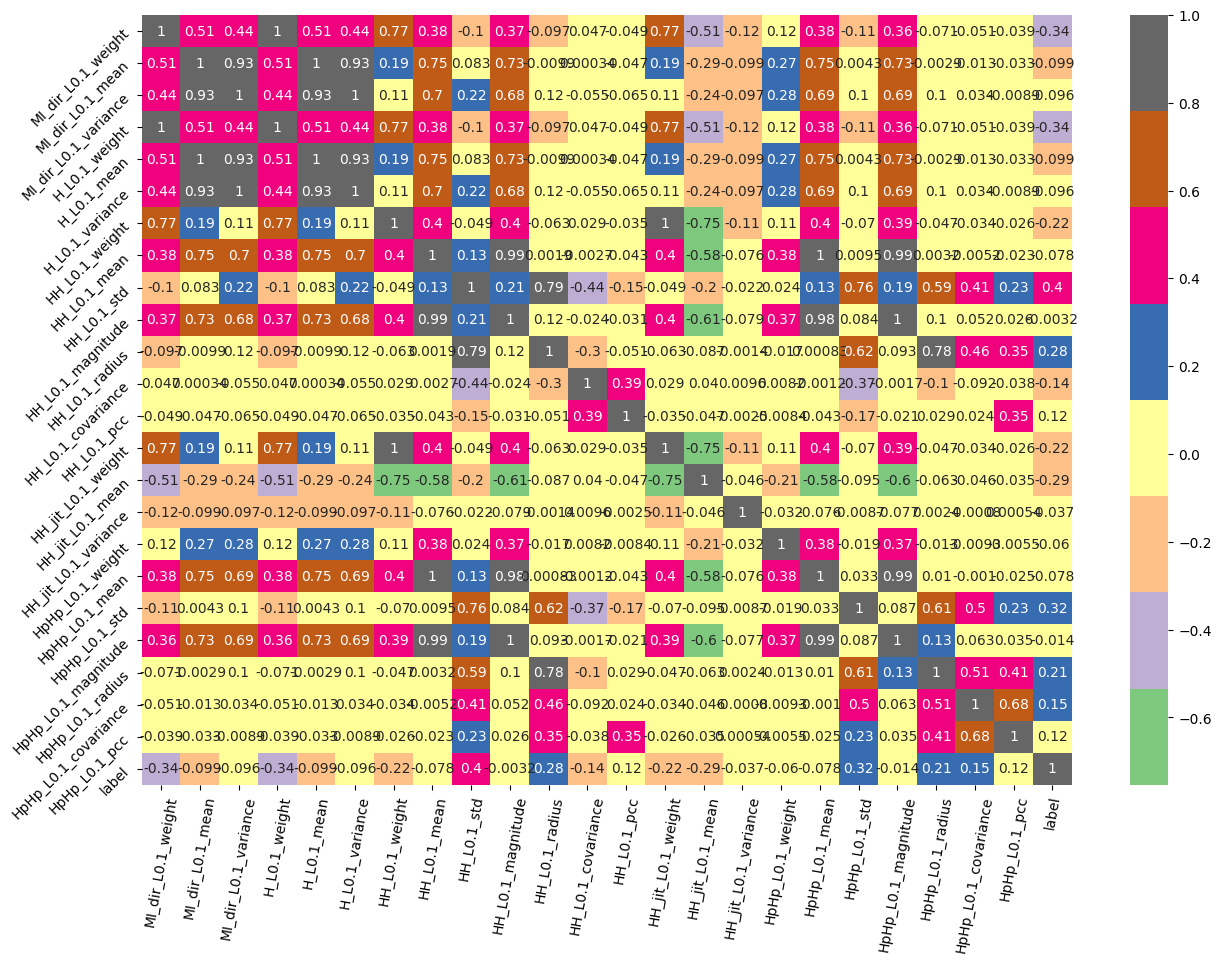

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap = 'Accent',annot = True)
plt.xticks(rotation = 80)
plt.yticks(rotation = 45)
plt.show()

In [13]:
labels = ['Normal', 'BASHLITE', 'Mirai']
labels

['Normal', 'BASHLITE', 'Mirai']

In [14]:
columns = ['Device_Name','Attack_subType']
data = data.drop(columns = columns)

In [15]:
data

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,...,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.348699e-06,138.592929,...,5.662344e+17,1.931640,98.000000,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,gafgyt,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.000000,0.000000e+00,114.856432,...,0.000000e+00,1.000000,66.000000,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.000000,0.000000e+00,74.000000,...,0.000000e+00,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.000000,9.536743e-07,74.000000,...,5.669445e+17,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,gafgyt,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062601,2.937269,217.763487,1.770682e+04,2.937269,217.763487,1.770682e+04,1.220882,60.000000,9.540000e-07,84.852814,...,1.420449e-01,1.220882,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,Normal,1
7062602,1.730254,282.630543,1.054589e+04,1.730254,282.630543,1.054589e+04,1.213342,330.000000,5.390000e-06,431.490440,...,6.290560e-04,1.213342,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,Normal,1
7062603,2.730251,299.980395,7.204117e+03,2.730251,299.980395,7.204117e+03,1.213352,330.000000,6.610000e-06,431.490440,...,6.157700e-04,1.213352,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,Normal,1
7062604,2.882414,216.723647,1.775308e+04,2.882414,216.723647,1.775308e+04,1.209274,60.000000,6.740000e-07,84.852814,...,1.103026e-01,1.209274,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,Normal,1


In [16]:
Labels = ['Attack']

for i in Labels:
    data[i] = LabelEncoder().fit_transform(data[i])
data

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Attack,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,...,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,1,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.348699e-06,138.592929,...,5.662344e+17,1.931640,98.000000,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,1,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.000000,0.000000e+00,114.856432,...,0.000000e+00,1.000000,66.000000,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,1,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.000000,0.000000e+00,74.000000,...,0.000000e+00,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,1,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.000000,9.536743e-07,74.000000,...,5.669445e+17,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062601,2.937269,217.763487,1.770682e+04,2.937269,217.763487,1.770682e+04,1.220882,60.000000,9.540000e-07,84.852814,...,1.420449e-01,1.220882,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,0,1
7062602,1.730254,282.630543,1.054589e+04,1.730254,282.630543,1.054589e+04,1.213342,330.000000,5.390000e-06,431.490440,...,6.290560e-04,1.213342,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,0,1
7062603,2.730251,299.980395,7.204117e+03,2.730251,299.980395,7.204117e+03,1.213352,330.000000,6.610000e-06,431.490440,...,6.157700e-04,1.213352,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,0,1
7062604,2.882414,216.723647,1.775308e+04,2.882414,216.723647,1.775308e+04,1.209274,60.000000,6.740000e-07,84.852814,...,1.103026e-01,1.209274,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,0,1


### countplot

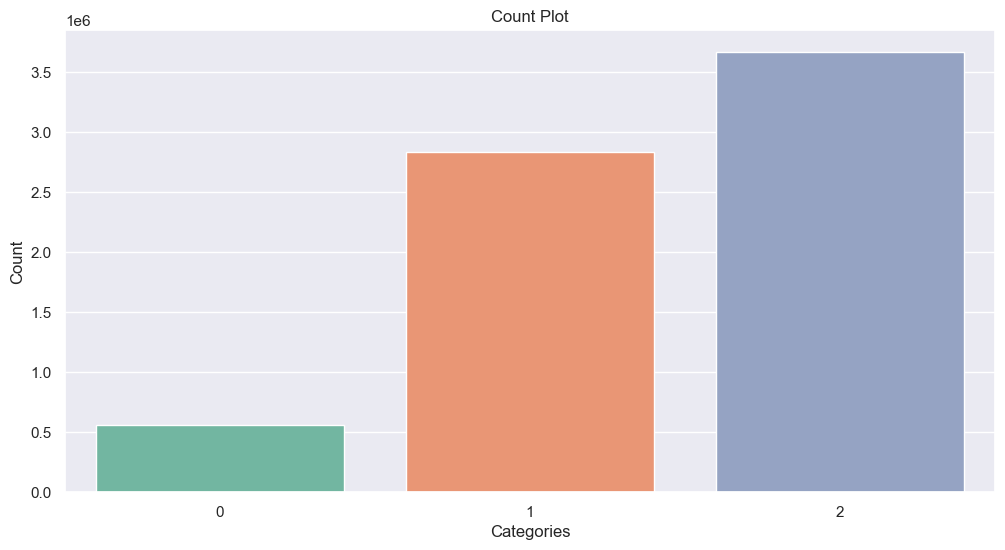

In [17]:
sns.set(style="darkgrid") 
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x=data['Attack'], palette="Set2")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 
plt.show()

In [18]:
x = data.drop(['Attack'], axis = 1)
x

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,...,1.505914e+09,0.000000e+00,1.000000,98.000000,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.348699e-06,138.592929,...,7.263102e+08,5.662344e+17,1.931640,98.000000,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,0
2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.000000,0.000000e+00,114.856432,...,1.505914e+09,0.000000e+00,1.000000,66.000000,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,0
3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.000000,0.000000e+00,74.000000,...,1.505914e+09,0.000000e+00,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.000000,9.536743e-07,74.000000,...,7.529571e+08,5.669445e+17,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062601,2.937269,217.763487,1.770682e+04,2.937269,217.763487,1.770682e+04,1.220882,60.000000,9.540000e-07,84.852814,...,2.467063e+01,1.420449e-01,1.220882,60.000000,9.540000e-07,84.852814,1.290000e-12,1.720000e-29,1.890000e-17,1
7062602,1.730254,282.630543,1.054589e+04,1.730254,282.630543,1.054589e+04,1.213342,330.000000,5.390000e-06,431.490440,...,2.507751e+01,6.290560e-04,1.213342,330.000000,5.390000e-06,431.490440,2.910000e-11,7.390000e-83,0.000000e+00,1
7062603,2.730251,299.980395,7.204117e+03,2.730251,299.980395,7.204117e+03,1.213352,330.000000,6.610000e-06,431.490440,...,2.507690e+01,6.157700e-04,1.213352,330.000000,6.610000e-06,431.490440,4.370000e-11,1.560000e-81,0.000000e+00,1
7062604,2.882414,216.723647,1.775308e+04,2.882414,216.723647,1.775308e+04,1.209274,60.000000,6.740000e-07,84.852814,...,2.531063e+01,1.103026e-01,1.209274,60.000000,6.740000e-07,84.852814,4.550000e-13,8.910000e-30,0.000000e+00,1


In [19]:
y = data['Attack']
y

0          1
1          1
2          1
3          1
4          1
          ..
7062601    0
7062602    0
7062603    0
7062604    0
7062605    0
Name: Attack, Length: 7062606, dtype: int32

## Splitting the Data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [21]:
x_train

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
4126528,2907.638689,324.476125,63855.332775,2907.638689,324.476125,63855.332775,1520.546174,565.654289,13.221574,565.654289,...,5.252860e+02,7.919357e+11,1.000000,566.000000,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000,0
6705230,10.519935,69.003713,240.529151,10.519935,69.003713,240.529151,9.208787,69.082993,16.369617,116.151706,...,1.790540e+00,3.918227e+00,3.272260,66.000000,0.000289,118.477416,1.492747e+02,-4.260000e-08,-0.000012,1
2981471,5016.581156,332.038537,60378.187198,5016.581156,332.038537,60378.187198,2762.691683,553.960784,4.401293,553.960784,...,1.971835e+02,2.972776e+11,2762.472365,554.000000,0.000028,554.000000,7.566996e-10,0.000000e+00,0.000000,0
3637277,4287.423704,343.810286,59632.608733,4287.423704,343.810286,59632.608733,1.000000,60.000000,0.000000,60.000000,...,1.507656e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
1924303,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505914e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692743,6745.425807,433.644753,44967.392736,6745.425807,433.644753,44967.392736,1.000000,60.000000,0.000000,60.000000,...,1.507656e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
6550634,2.728456,92.271063,250.386719,2.728456,92.271063,250.386719,1.664556,86.052817,17.642499,109.741885,...,1.485927e+01,4.393431e+01,1.141220,98.000000,0.000000,138.592929,0.000000e+00,-3.180000e-38,0.000000,1
6423388,2112.283980,390.097323,54103.834972,2112.283980,390.097323,54103.834972,1.000000,60.000000,0.000000,60.000000,...,1.507659e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
6962611,4.865861,349.318479,28510.787520,4.865861,349.318479,28510.787520,3.428948,456.334137,19.344542,456.334137,...,9.994669e+00,1.997785e+02,3.428948,456.334137,19.344542,456.334137,3.742113e+02,0.000000e+00,0.000000,1


In [22]:
y_train

4126528    2
6705230    0
2981471    2
3637277    2
1924303    1
          ..
1692743    2
6550634    0
6423388    2
6962611    0
6413414    2
Name: Attack, Length: 4943824, dtype: int32

In [23]:
x_test

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
526490,2242.399005,60.022856,0.819372,2242.399005,60.022856,0.819372,1.000000,60.000000,0.000000,60.000000,...,1.507654e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,0
6039663,6346.415450,440.503160,47749.390536,6346.415450,440.503160,47749.390536,4772.929515,565.936001,5.690286,565.936001,...,8.018301e+01,1.208840e+11,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,0
2064653,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505913e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,0
6912545,1.507942,83.831074,128.554742,1.507942,83.831074,128.554742,1.047683,90.000000,0.000572,90.000000,...,4.457580e+01,4.437140e-04,1.047683,90.0,0.000572,90.0,3.270000e-07,0.0,0.0,1
418356,6288.158972,388.592726,58291.718739,6288.158972,388.592726,58291.718739,1.000000,60.000000,0.000000,60.000000,...,1.507658e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804478,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505913e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,0
2854991,6457.991989,386.068929,54752.715294,6457.991989,386.068929,54752.715294,1.000000,60.000000,0.000000,60.000000,...,1.507656e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,0
248738,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505913e+09,0.000000e+00,1.000000,60.0,0.000000,60.0,0.000000e+00,0.0,0.0,0
5396304,6597.280567,70.798279,34.584892,6597.280567,70.798279,34.584892,5082.131904,73.997440,0.189315,73.997440,...,1.282179e+00,1.928803e+09,1.000000,74.0,0.000000,74.0,0.000000e+00,0.0,0.0,0


In [24]:
y_test

526490     2
6039663    2
2064653    1
6912545    0
418356     2
          ..
4804478    1
2854991    2
248738     1
5396304    2
2810255    2
Name: Attack, Length: 2118782, dtype: int32

In [25]:
x_train.shape

(4943824, 24)

In [26]:
y_train.shape

(4943824,)

## Performance Evaluation

In [27]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

## BernoulliNBClassifier Algorithm

BernoulliNBClassifier Accuracy    : 94.92505599915422
BernoulliNBClassifier Precision   : 96.70710597603099
BernoulliNBClassifier Recall      : 95.56494961915006
BernoulliNBClassifier FSCORE      : 95.93531775620107

 BernoulliNBClassifier classification report
               precision    recall  f1-score   support

      Normal       0.99      0.99      0.99    167553
    BASHLITE       0.88      1.00      0.93    745834
       Mirai       1.00      0.91      0.95   1205395

    accuracy                           0.95   2118782
   macro avg       0.96      0.97      0.96   2118782
weighted avg       0.96      0.95      0.95   2118782



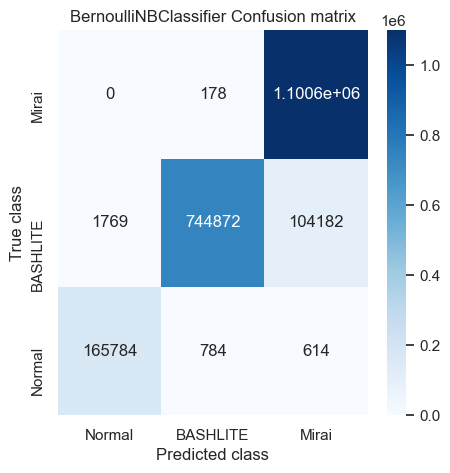

In [28]:
if os.path.exists('BernoulliNBClassifier.pkl'):
    # Load the Bernoulli Naive Bayes Classifier model
    bnb_classifier = joblib.load('BernoulliNBClassifier.pkl')
    predict = bnb_classifier.predict(x_test)
else:                       
    # Train and save the Bernoulli Naive Bayes Classifier model
    bnb_classifier = BernoulliNB()
    bnb_classifier.fit(x_train, y_train)
    joblib.dump(bnb_classifier, 'BernoulliNBClassifier.pkl')


# Predict using the trained Bernoulli Naive Bayes Classifier model
y_pred_bnb = bnb_classifier.predict(x_test)

# Evaluate the Bernoulli Naive Bayes Classifier model
performance_metrics('BernoulliNBClassifier', y_pred_bnb, y_test)

## RandomForestClassifier

RandomForest Classifier Accuracy    : 100.0
RandomForest Classifier Precision   : 100.0
RandomForest Classifier Recall      : 100.0
RandomForest Classifier FSCORE      : 100.0

 RandomForest Classifier classification report
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    167182
    BASHLITE       1.00      1.00      1.00    850823
       Mirai       1.00      1.00      1.00   1100777

    accuracy                           1.00   2118782
   macro avg       1.00      1.00      1.00   2118782
weighted avg       1.00      1.00      1.00   2118782



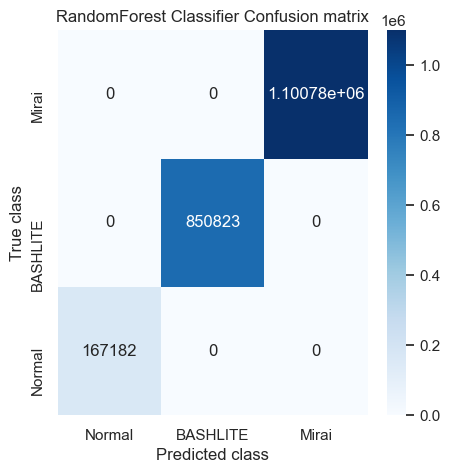

In [29]:
if os.path.exists('RandomForest_weights.pkl'):
    # Load the model from the pkl file
    classifier = joblib.load('RandomForest_weights.pkl')
else:
    # Train the classifier on the training data
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(classifier, 'RandomForest_weights.pkl')
    print("RandomForest classifier model trained and model weights saved.")
    
y_pred = classifier.predict(x_test)
performance_metrics("RandomForest Classifier", y_pred, y_test)

In [31]:
test = pd.read_csv(r"test.csv")
test

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,Device_Name,Attack_subType,label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,SimpleHome_XCS7_1003_WHT_Security_Camera,udp,0
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,SimpleHome_XCS7_1003_WHT_Security_Camera,tcp,0
2,971.705354,74.858139,377.452222,971.705354,74.858139,377.452222,1.000000,74.000000,0.000000,74.000000,...,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000,Ecobee_Thermostat,scan,0
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,Provision_PT_737E_Security_Camera,udp,0
4,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,Provision_PT_838_Security_Camera,udp,0
5,2224.608602,60.015431,0.388857,2224.608602,60.015431,0.388857,1.000000,60.000000,0.000000,60.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,Philips_B120N10_Baby_Monitor,scan,0
6,1960.569738,60.611286,13.212752,1960.569738,60.611286,13.212752,1.000000,60.000000,0.000000,60.000000,...,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,SimpleHome_XCS7_1003_WHT_Security_Camera,scan,0
7,6481.155360,380.270380,55637.987772,6481.155360,380.270380,55637.987772,4202.245678,553.947341,5.100064,553.947341,...,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000,Danmini_Doorbell,udp,0
8,6345.942937,385.175928,54894.226599,6345.942937,385.175928,54894.226599,4177.797090,553.921383,6.231433,553.921383,...,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000,Danmini_Doorbell,udp,0
9,6654.572224,69.497242,43.115977,6654.572224,69.497242,43.115977,4509.309988,73.997468,0.188245,73.997468,...,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000,Philips_B120N10_Baby_Monitor,syn,0


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 26 columns):
MI_dir_L0.1_weight      15 non-null float64
MI_dir_L0.1_mean        15 non-null float64
MI_dir_L0.1_variance    15 non-null float64
H_L0.1_weight           15 non-null float64
H_L0.1_mean             15 non-null float64
H_L0.1_variance         15 non-null float64
HH_L0.1_weight          15 non-null float64
HH_L0.1_mean            15 non-null float64
HH_L0.1_std             15 non-null float64
HH_L0.1_magnitude       15 non-null float64
HH_L0.1_radius          15 non-null float64
HH_L0.1_covariance      15 non-null float64
HH_L0.1_pcc             15 non-null float64
HH_jit_L0.1_weight      15 non-null float64
HH_jit_L0.1_mean        15 non-null float64
HH_jit_L0.1_variance    15 non-null float64
HpHp_L0.1_weight        15 non-null float64
HpHp_L0.1_mean          15 non-null float64
HpHp_L0.1_std           15 non-null float64
HpHp_L0.1_magnitude     15 non-null float64
HpHp_L0.1_radius 

In [33]:
columns = ['Device_Name','Attack_subType']
test = test.drop(columns = columns)

In [34]:
test

,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,HH_L0.1_magnitude,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505913e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505914e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
2,971.705354,74.858139,377.452222,971.705354,74.858139,377.452222,1.000000,74.000000,0.000000,74.000000,...,1.505913e+09,0.000000e+00,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000,0
3,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505913e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
4,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,60.000000,...,1.505913e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
5,2224.608602,60.015431,0.388857,2224.608602,60.015431,0.388857,1.000000,60.000000,0.000000,60.000000,...,1.507653e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
6,1960.569738,60.611286,13.212752,1960.569738,60.611286,13.212752,1.000000,60.000000,0.000000,60.000000,...,1.507655e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,0
7,6481.155360,380.270380,55637.987772,6481.155360,380.270380,55637.987772,4202.245678,553.947341,5.100064,553.947341,...,4.449267e-01,6.656149e+08,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000,0
8,6345.942937,385.175928,54894.226599,6345.942937,385.175928,54894.226599,4177.797090,553.921383,6.231433,553.921383,...,3.457321e-03,7.773436e-01,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.000000e+00,0.000000,0
9,6654.572224,69.497242,43.115977,6654.572224,69.497242,43.115977,4509.309988,73.997468,0.188245,73.997468,...,1.973214e+00,2.970101e+09,1.000000,74.000000,0.000000,74.000000,0.000000e+00,0.000000e+00,0.000000,0


In [35]:
predict = classifier.predict(test)
predict

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0])

In [38]:
A='Normal'
B='BASHLITE'
c='mirai'
#test = pd.read_csv((r"test.csv")
predict = classifier.predict(test)
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :{} ".format(test.iloc[i,:],A))
    elif predict[i] == 1:
        print("{} {} ".format(test.iloc[i,:],B))
    elif predict[i]== 2:
        print("{} :{} ".format(test.iloc[i, :],c))

MI_dir_L0.1_weight      1.000000e+00
MI_dir_L0.1_mean        6.000000e+01
MI_dir_L0.1_variance    0.000000e+00
H_L0.1_weight           1.000000e+00
H_L0.1_mean             6.000000e+01
H_L0.1_variance         0.000000e+00
HH_L0.1_weight          1.000000e+00
HH_L0.1_mean            6.000000e+01
HH_L0.1_std             0.000000e+00
HH_L0.1_magnitude       6.000000e+01
HH_L0.1_radius          0.000000e+00
HH_L0.1_covariance      0.000000e+00
HH_L0.1_pcc             0.000000e+00
HH_jit_L0.1_weight      1.000000e+00
HH_jit_L0.1_mean        1.505913e+09
HH_jit_L0.1_variance    0.000000e+00
HpHp_L0.1_weight        1.000000e+00
HpHp_L0.1_mean          6.000000e+01
HpHp_L0.1_std           0.000000e+00
HpHp_L0.1_magnitude     6.000000e+01
HpHp_L0.1_radius        0.000000e+00
HpHp_L0.1_covariance    0.000000e+00
HpHp_L0.1_pcc           0.000000e+00
label                   0.000000e+00
Name: 0, dtype: float64 BASHLITE 
MI_dir_L0.1_weight      1.000000e+00
MI_dir_L0.1_mean        6.000000e+01
MI_d